## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [65]:
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

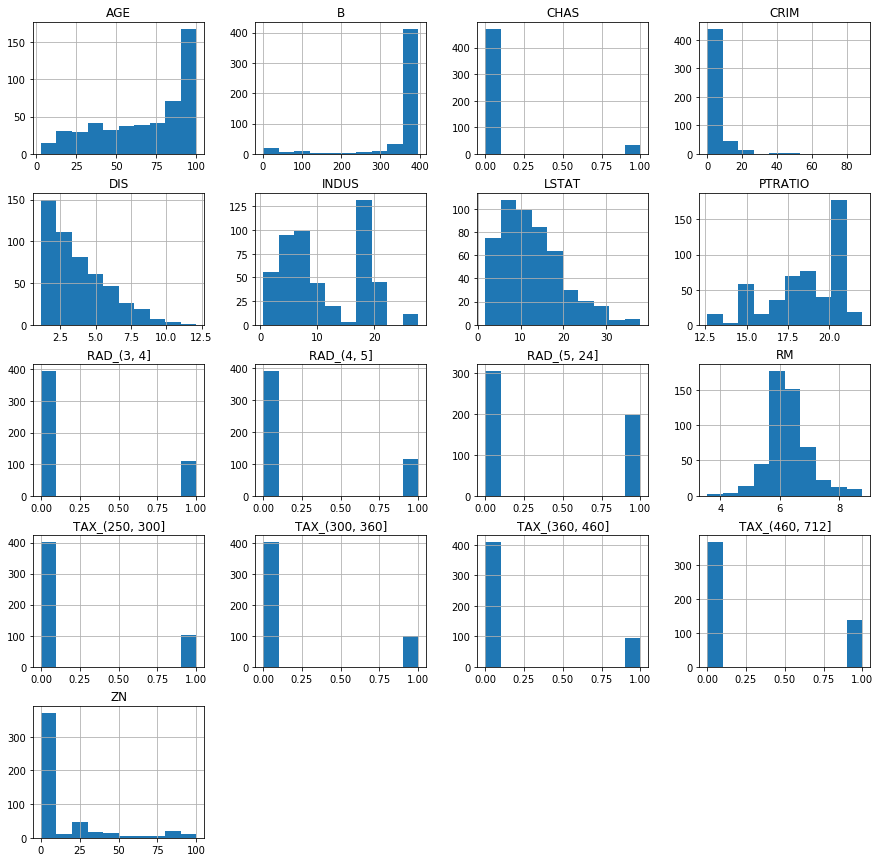

In [66]:
# Your code here
cols = []
for i in list(boston_features.columns):
    cols.append(str(i))

boston_features[cols].hist(figsize  = [15, 15]); 

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

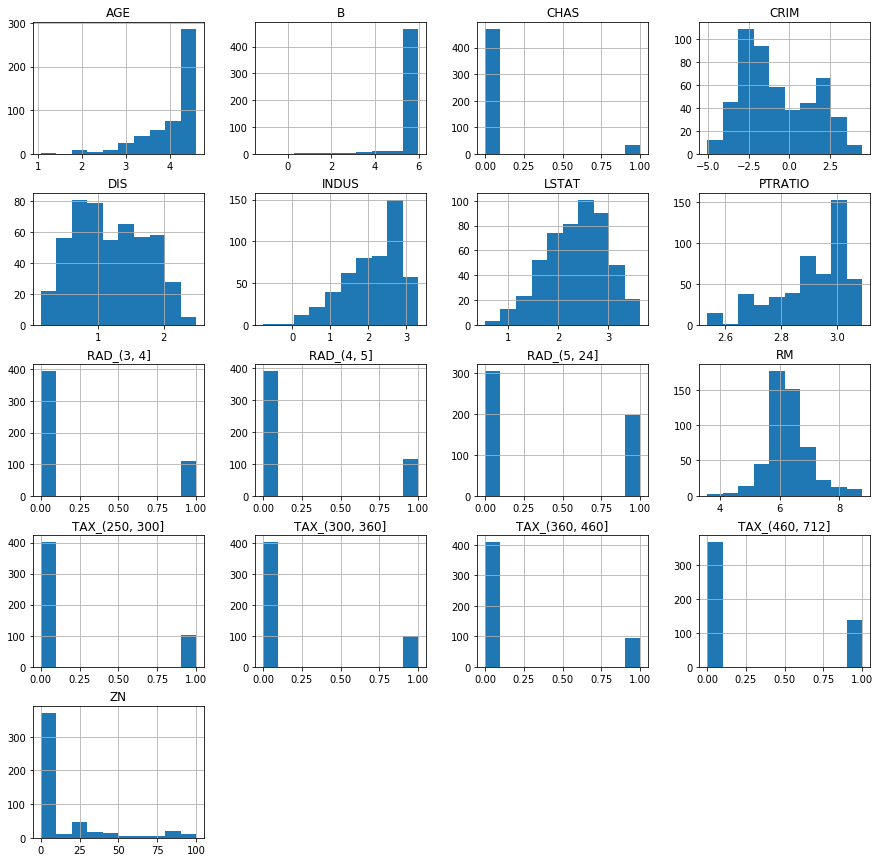

In [67]:
# Your code here
import numpy as np
data_log = pd.DataFrame([])

def boston_log(column_names):
    for col in column_names:
        data_log[col] = np.log(boston_features[col])
        boston_features[col] = data_log[col]
    
col_names = ['AGE','B','CRIM','DIS','INDUS','LSTAT','PTRATIO']
boston_log(col_names)

boston_features[cols].hist(figsize  = [15, 15]); 

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [75]:
data_log['ZN'] = np.log(boston_features['ZN'])
# boston_features['ZN'].describe()
boston_features.drop(['ZN'], axis=1)
# Dropped ZN due to zero-inflation

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,-5.064036,0.837248,0.0,6.575,4.177459,1.408545,2.727853,5.983684,1.605430,0,0,0,1,0,0,0
1,-3.600502,1.955860,0.0,6.421,4.368181,1.602836,2.879198,5.983684,2.212660,0,0,0,0,0,0,0
2,-3.601235,1.955860,0.0,7.185,4.112512,1.602836,2.879198,5.973377,1.393766,0,0,0,0,0,0,0
3,-3.430523,0.779325,0.0,6.998,3.824284,1.802073,2.928524,5.977949,1.078410,0,0,0,0,0,0,0
4,-2.672924,0.779325,0.0,7.147,3.992681,1.802073,2.928524,5.983684,1.673351,0,0,0,0,0,0,0
5,-3.511570,0.779325,0.0,6.430,4.072440,1.802073,2.928524,5.976655,1.650580,0,0,0,0,0,0,0
6,-2.427128,2.063058,0.0,6.012,4.198705,1.715688,2.721295,5.980404,2.520113,0,1,0,0,1,0,0
7,-1.934130,2.063058,0.0,6.172,4.565389,1.783475,2.721295,5.983684,2.952303,0,1,0,0,1,0,0
8,-1.554760,2.063058,0.0,5.631,4.605170,1.805350,2.721295,5.957468,3.398861,0,1,0,0,1,0,0
9,-1.771722,2.063058,0.0,6.004,4.453184,1.885872,2.721295,5.957675,2.839078,0,1,0,0,1,0,0


## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

###AGE###
###B###
###CRIM###
###DIS###
###INDUS###
###LSTAT###
###PTRATIO###


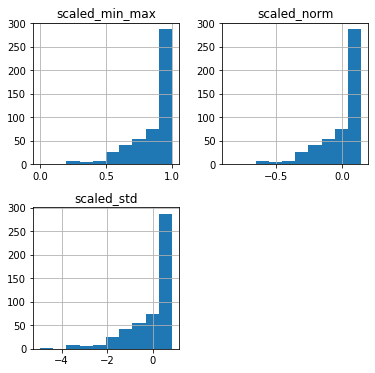

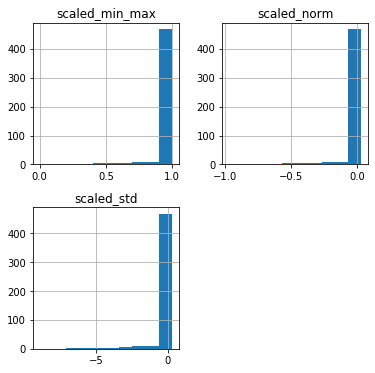

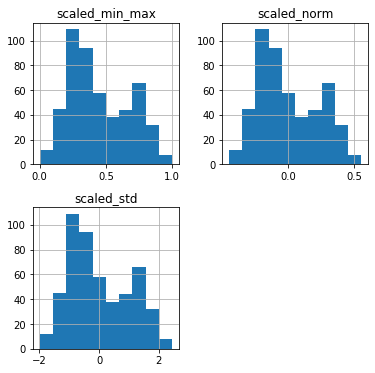

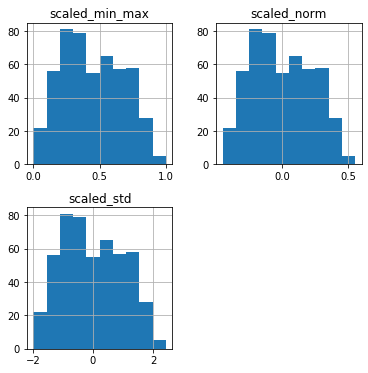

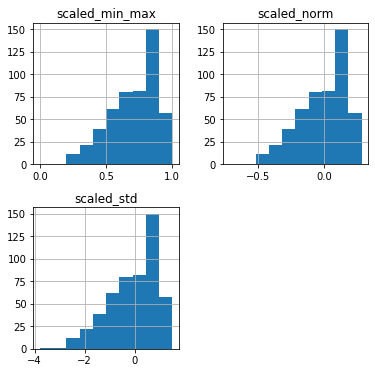

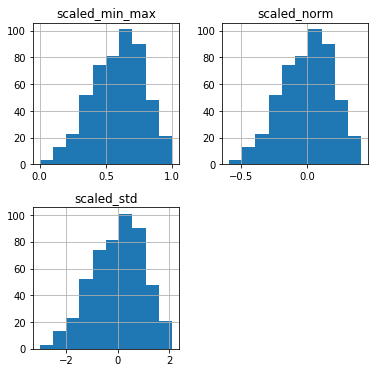

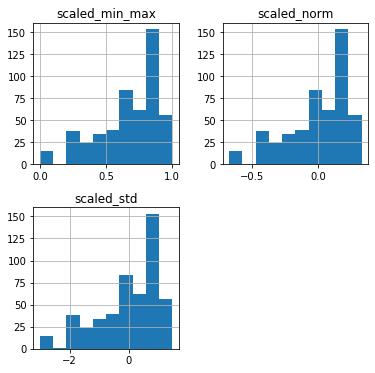

In [83]:
# Your code here
def preview_scaling(col):
    scaled_col_min_max = (boston_features[col] - min(boston_features[col])) / (max(boston_features[col]) - min(boston_features[col]))
    
    scaled_col_std = (data_log[col] - np.mean(data_log[col])) / np.sqrt(np.var(data_log[col]))
    
    scaled_col_norm = (data_log[col] - np.mean(data_log[col])) / (max(data_log[col]) - min(data_log[col]))


    data_cont_scaled = pd.DataFrame([])
    data_cont_scaled['scaled_min_max'] = scaled_col_min_max
    data_cont_scaled['scaled_std'] = scaled_col_std
    data_cont_scaled['scaled_norm'] = scaled_col_norm

#     print(f'###{col}###')
    data_cont_scaled.hist(figsize = [6, 6]);
    
for col in col_names:
    preview_scaling(col)

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!

In [106]:
features_final = pd.DataFrame([])
features_final['AGE'] = (boston_features['AGE'] - min(boston_features['AGE'])) / (max(boston_features['AGE']) - min(boston_features['AGE']))
features_final['B'] = (boston_features['B'] - min(boston_features['B'])) / (max(boston_features['B']) - min(boston_features['B']))
features_final['CRIM'] = (data_log['CRIM'] - np.mean(data_log['CRIM'])) / (max(data_log['CRIM']) - min(data_log['CRIM']))    
features_final['DIS'] = (data_log['DIS'] - np.mean(data_log['DIS'])) / np.sqrt(np.var(data_log['DIS']))
features_final['INDUS'] = (data_log['INDUS'] - np.mean(data_log['INDUS'])) / np.sqrt(np.var(data_log['INDUS']))
features_final['LSTAT'] = (data_log['LSTAT'] - np.mean(data_log['LSTAT'])) / (max(data_log['LSTAT']) - min(data_log['LSTAT']))  
features_final['PTRATIO'] = (boston_features['PTRATIO'] - min(boston_features['PTRATIO'])) / (max(boston_features['PTRATIO']) - min(boston_features['PTRATIO'])) 
                                                                                                                                            
                                                                                                            
                                                                                                            

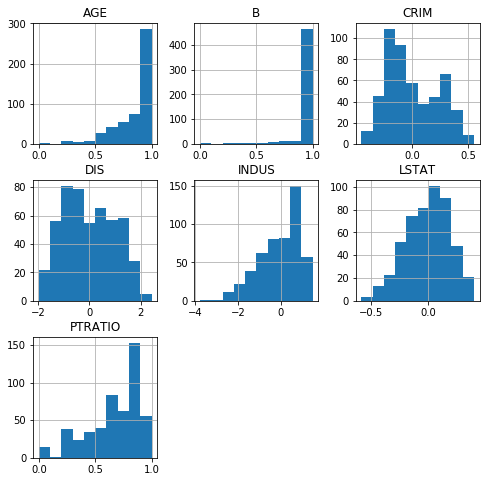

In [107]:
features_final.hist(figsize  = [8, 8]);